<center> <h1>Ingénierie des caractéristiques(Features engineering): <br>
Features Selection
</h1></center>

Pour regarder la vidéo du support de cours:
https://youtu.be/OTEhvJhismM


<h1> Plan </h1>

*	Introduction
*	Préparation de l'environnement
  *	Préparation de la base d'image
  *	Fonction de classification
*	Méthodes de sélection de caractéristiques
  *	Chi2
  *	Recursive Function Elimination (RFE)
  *	Relief
  *	Random Forest
*	Etude comparative
*	Conclusion

<h1>Introduction</h1>
La sélection de caractéristiques (features selection) est l’opération permettant de d’extraire intelligemment de la connaissance à partir des données brutes.

Objectif:
* Améliorer les performances (en termes de rapidité, de puissance de prédiction et de la simplicité du modèle).
* Réduire les dimensions et éliminer le bruit.

La sélection des caractéristiques est un processus qui choisit un sous-ensemble optimal de caractéristique en fonction d'un critère donné.

Objectif de FS: <br>
* Supprimer les données non pertinentes,
* Augmenter de la précision du modèle d’apprentissage notamment en réduisant les besoins en stockage et les coûts de calcul,
* Réduire le nombre de données,
* Réduire la complexité de la description du modèle résultant,
* Améliorer la compréhension des données et du modèle.

<h2> Préparation de l'environnement</h2>

Nous allons travailler dans cet atelier avec la base de données Titanic pour tester les opérations de transformation en ingénierie de caractéristiques. Cette base de données contient les informations des voyageurs qui ont embarqué sur le bateau Titanic et qui ont été soit sauvés soit noyés. La base contient  891 enregistrements et 12 features.

Cette base est très populaire et utilisée pour tester ce type de traitement.

Il faut tout d'abord télécharger le fichier  "train_Titanic.csv" et la charger sur votre google drive.
Pour télécharger le fichier de caractéristiques et les étiquettes cliquer sur les liens ci-dessous :

[Base de données Titanic: ](https://drive.google.com/file/d/1OfyPPBg16sv-8lQHOa6RVDi-i5urLHfj/view?usp=drive_link)

Vous pouvez utiliser le même chemin que celui que j'ai utilisé :
/content/drive/MyDrive/FeaturesEngineering/
- Créer un dossier sur la racine de votre drive "MyDrive" et nommé le: "FeaturesEngineering"
- Copier lee fichiers "train_Titanic.csv" dans le dossier "FeaturesEngineering"

In [ ]:
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 <h2> Prèparation de la base de données</h2>
 Nous allons commencer par nettoyer la base afin de supprimer les champs non nécessaires pour notre atelier pour ne garder que 8 caractéristiques en plus des **étiquettes** qui sont dans le champ "**Survived**" avec la valeur 1 pour personne sauvée et 0 pour une personne noyée

In [ ]:
import pandas as pd
fetauresPath='/content/drive/MyDrive/FeaturesEngineering/'
data=pd.read_csv(fetauresPath+'train_Titanic.csv')

# Supprimer les colonnes non nécessaire pour la classification
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

<H2> Fonction de classification </h2>

Pour la classification, nous allons utiliser l’algorithme SVM avec un kernel RBF. Après chaque traitement, nous allons appeler la fonction Classify qui admet en argument les données et leurs étiquettes.

La fonction divise les données en données d’entrainement et de validation, lance l’entrainement et valide le modèle et après affiche le taux de classification l’Accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def classify(dataX, labels):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(dataX, labels, test_size=0.2, random_state=24)
  #print("X_train:", np.array(X_train).shape, "X_test:", np.array(X_test).shape)
  model = SVC(kernel='rbf', C=1, gamma='auto')
  # Lancer l'entrainement
  model.fit(X_train, y_train)
  # Lancer la prédiction de la base de validation
  y_pred = model.predict(X_test)
  # Afficher l'accuracy
  accuracy= accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

# Additional metrics
  print("Classification Report:\n", classification_report(y_test, y_pred))
  # Retourner l'accuracy
  return accuracy

<h1> Transformation</H1>
<H2> Encodage Unique </h2>
L'encodage unique, ou "Label Encoding" en anglais, est une technique de prétraitement des données utilisées en apprentissage automatique (machine learning) pour convertir des données catégorielles (ou qualitatives) en données numériques.

In [ ]:
# Convertir la valeur de la colonne sexe au valeur numériques: male=0 et female=1
data['Sex']=(data['Sex']=='female').astype('Int32')

# Convertir les informations d'embarquement (embarked) aux valeurs numériques
# embarked:  Port of Embarkation (C = Cherbourg = 0; Q = Queenstown =1 ; S = Southampton=2)
embarked=data['Embarked'].unique().tolist()
data['Embarked']=data['Embarked'].apply(lambda x: embarked.index(x))


# Créer les étiquettes (labels)
y=data.iloc[:,data.columns=='Survived']
y=np.ravel(y)
# Supprimer la colonne de labels des données et les Copier dans X
X=data.drop(['Survived'], axis=1, inplace=False)
# Afficher l'entête de X
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [ ]:
# Vérifiez et afficher les colonnes contenant avec leurs nombres de valeurs manquantes
print(X.isna().sum())

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


<H2> Traitement des valeurs manquantes</H2>

Un des problèmes les plus rencontrés dans le traitement des données et les valeurs manquantes c’est-à-dire des enregistrements qui n ont pas toutes les données. Ces valeurs manquantes sont souvent représentées par NA pour not a value ou Null.

Pour résoudre ce problème et traiter les erreurs manquantes il est possible de procéder à La Suppression des colonnes ou les lignes contenant un nombre de données manquantes supérieurs à un seuil; exemple >70%. Ou bien, procéder au remplacement qui est préférable que la suppression car on garde la même taille de données initiales. On peut les remplacer par une valeur par défaut ou zéro, Ou bien utiliser l’inverse dans le cas binaire: si on a des 1. Aussi, on peut Utiliser la moyenne ou la médiane dans le cas où les valeurs manquantes ne sont pas importantes. Ou même les remplacer par la valeur maximale de l'occurrence Et ainsi de suite

In [ ]:
# Imputer avec la moyenne des colonnes
X.fillna(X.mean(), inplace=True)

# Evaluer la classification
classify(X, y)

Accuracy: 0.7094972067039106
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       117
           1       0.59      0.55      0.57        62

    accuracy                           0.71       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.71      0.71      0.71       179



<ipython-input-71-c590da32e6d8>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.fillna(X.mean(), inplace=True)


0.7094972067039106

<h1>Sélection de caractéristiques (features selection)</h1>
La sélection de caractéristiques (features selection) est l’opération permettant de d’extraire intelligemment de la connaissance à partir des données brutes.

Objectif:
* Améliorer les performances (en termes de rapidité, de puissance de prédiction et de la simplicité du modèle).
* Réduire les dimensions et éliminer le bruit.

La sélection des caractéristiques est un processus qui choisit un sous-ensemble optimal de caractéristique en fonction d'un critère donné.

Objectif de FS: <br>
* Supprimer les données non pertinentes,
* Augmenter de la précision du modèle d’apprentissage notamment en réduisant les besoins en stockage et les coûts de calcul,
* Réduire le nombre de données,
* Réduire la complexité de la description du modèle résultant,
* Améliorer la compréhension des données et du modèle.

<h2>Les catégories de la sélection des caractéristiques</h2>
Trois approches sont généralement utilisées dans la sélection des caractéristiques : embedded, wrapper et filter: <br>

* Les méthodes « embedded » intègrent directement la sélection dans le processus d’apprentissage. Les arbres de décision est une illustration de ce système.
* Les méthodes « wrapper » optimisent explicitement un critère de précision, le plus souvent le taux d’erreur. Elles ne s’appuient en rien sur les caractéristiques de l’algorithme d’apprentissage qui est utilisé comme une boîte noire.
* les méthodes « filter » agissent en amont, avant la mise en œuvre de la technique d’apprentissage, et sans lien direct avec celui‐ci.

In [ ]:
totalFeatures=X.shape[1]
print("Nombre total de caractéristiques: ", totalFeatures)

Nombre total de caractéristiques:  7


<h2> Suppression des caractéristiques à faible variance</h2>
Suppression des caractéristiques à faible variance (Removing features with low variance) est une méthode de sélection (élimination) basée sur le filtrage.<br>
On peut la considérer comme une méthode de nettoyage de caractéristique qui  élémine toutes les caractéristiques dont la variance n'atteint pas un certain seuil.<br>
Par défaut, elle supprime toutes les caractéristiques à variance nulle, c'est-à-dire les caractéristiques qui ont la même valeur dans tous les échantillons.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
varTh = VarianceThreshold()
# Nous allons utiliser les caractéristiques aprés transformation logaritmique et standarization
Xvth=varTh.fit_transform(X)
print(Xvth.shape)
classify(Xvth,y)

(891, 7)
Accuracy: 0.7094972067039106
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       117
           1       0.59      0.55      0.57        62

    accuracy                           0.71       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.71      0.71      0.71       179



0.7094972067039106

On remarque que dans notre exemple, cette méthode n'a pas d'influence sur le taux de classification.

<h2>chi2</h2>
C’est un algorithme de sélection des caractéristiques qui appartient à la famille des algorithmes de filtrage basé sur la statistique 𝜒2. Cette méthode mesure l’écart à l’indépendance entre une caractéristique et une classe. Elle commence par un niveau de signification élevé pour toutes les caractéristiques pour la discrétisation et chaque caractéristique est triée en fonction de ses valeurs.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


k=4 # Nombre de caractéristiques à selectionner
chi2_bestfeatures = SelectKBest(score_func=chi2, k=k).fit(X, y) # probléme avec les vals négatives

Xchi2=chi2_bestfeatures.transform(X)
classify(Xchi2,y)

import pandas as pd
# Retourner le score de chaque caractéristique
dfscores = pd.DataFrame(chi2_bestfeatures.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concaténer les deux pour une meilleure visualisation
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # Nommer les colonnes du Dataframe
print(featureScores.nlargest(k, 'Score')) # Afficher les meilleurs k caractéristiques

Accuracy: 0.6759776536312849
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       117
           1       0.54      0.44      0.48        62

    accuracy                           0.68       179
   macro avg       0.63      0.62      0.62       179
weighted avg       0.66      0.68      0.67       179

  Feature        Score
5    Fare  4518.319091
1     Sex   170.348127
0  Pclass    30.873699
2     Age    24.687926


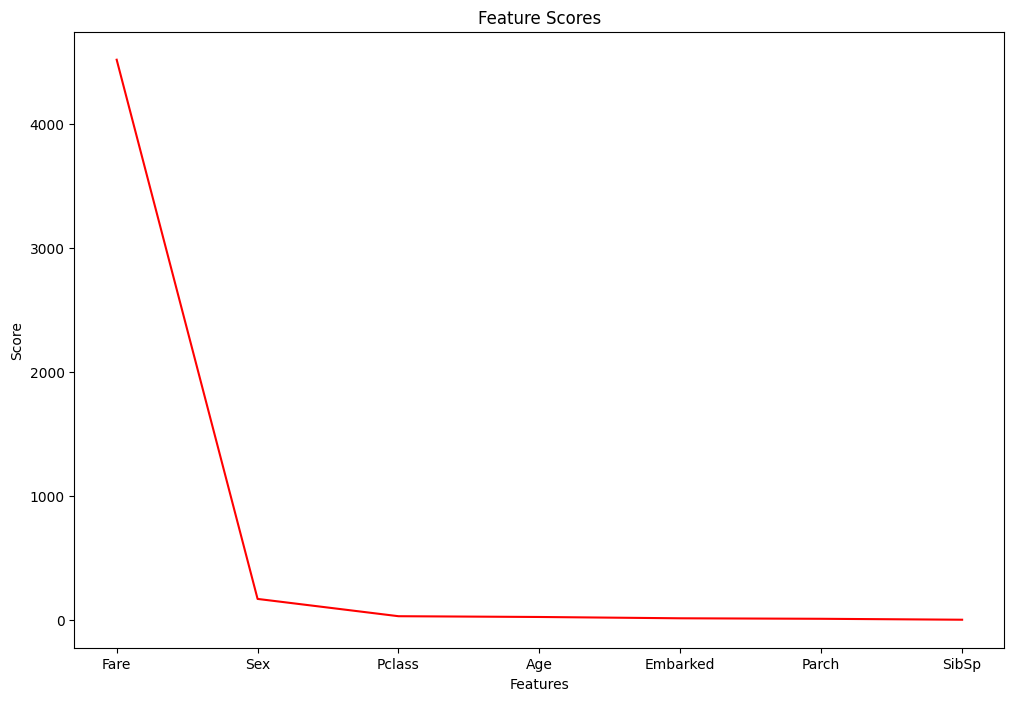

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd

chi2_bestfeatures = SelectKBest(score_func=chi2, k=totalFeatures).fit(X, y)
# Retourner le score de chaque caractéristique
dfscores = pd.DataFrame(chi2_bestfeatures.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concaténer les deux pour une meilleure visualisation
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score'] # Nommer les colonnes du Dataframe

# Trier les caractéristiques par leurs scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
# Représentation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(featureScores['Feature'], featureScores['Score'], color='red')
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.gca()
plt.show()


Fetaures names:  ['Fare']
Accuracy: 0.7374301675977654
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       117
           1       0.64      0.55      0.59        62

    accuracy                           0.74       179
   macro avg       0.71      0.69      0.70       179
weighted avg       0.73      0.74      0.73       179

Fetaures names:  ['Fare' 'Sex']
Accuracy: 0.7597765363128491
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       117
           1       0.69      0.56      0.62        62

    accuracy                           0.76       179
   macro avg       0.74      0.71      0.72       179
weighted avg       0.75      0.76      0.75       179

Fetaures names:  ['Fare' 'Sex' 'Pclass']
Accuracy: 0.7653631284916201
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86

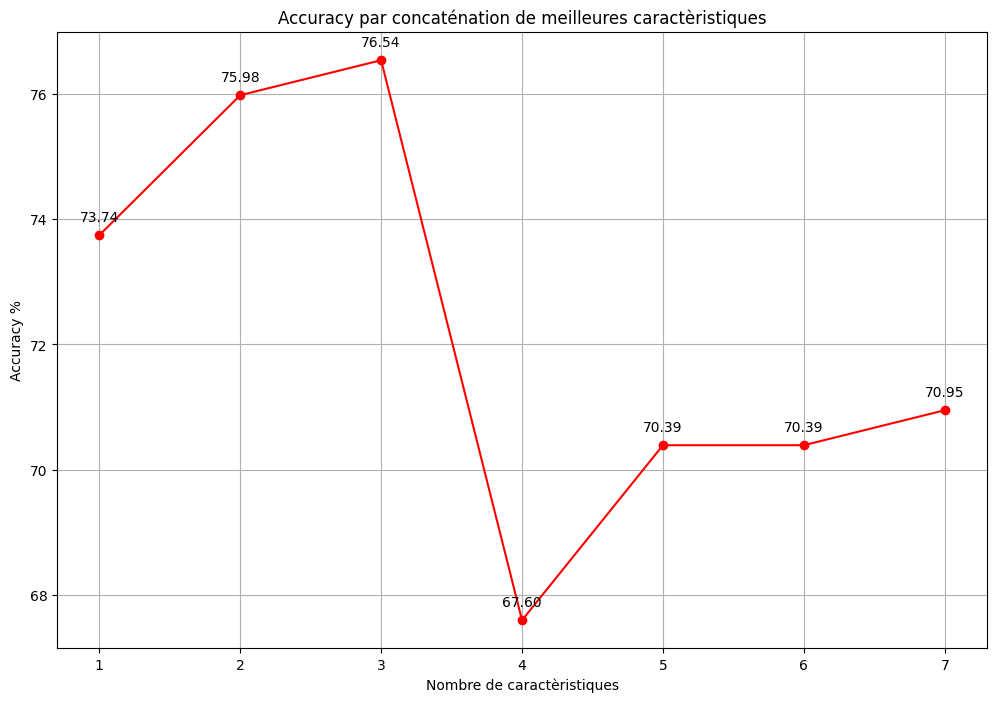

In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
accuraciesChie2 = []
for i in range (1,totalFeatures + 1):
  features_names = featureScores['Feature'][:i]
  print("Fetaures names: ", np.array(features_names))
  features = X[features_names]
  accuracy = classify(features,y)
  accuraciesChie2.append(accuracy * 100)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(1,totalFeatures + 1),accuraciesChie2, marker='o', linestyle='-',color='red')
for i, txt in enumerate(accuraciesChie2):
    plt.annotate(f"{txt:.2f}", (i+1, accuraciesChie2[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Nombre de caractèristiques')
plt.ylabel('Accuracy %')
plt.title('Accuracy par concaténation de meilleures caractèristiques')
plt.grid(True)
plt.gca()
plt.show()

On peut remarquer que le score maximal est obtenu avec seulement 4 caractéristiques et qui sont Fare, Sex, Pclass, Age. Aussi, on peut avec seulement ces 4 caractéristiques avoir le meilleur taux de classification.

<h2>Recursive Feature Elimination (RFE)</h2>
C’est une méthode de cartographie basée sur l'idée à plusieurs reprises, construire un modèle et choisir le meilleur ou le pire performant. Cette méthode qui appartient aux méthodes de filtrage est souvent utilisée comme étape de prétraitement pour les méthodes intégrée (souvent avec l’algorithme de classification SVM) afin de la généraliser à des grandes masses de données

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
# Créer un modèle de base qui soit linéaire
model = SVC(kernel="linear", C=1)
# Créer une instance RFE et sélectionner un certain nombre de caractéristiques
rfe = RFE(estimator=model, n_features_to_select=4,  step=1)

# Ajuster le modèle RFE
rfe = rfe.fit(X, y)

# Créer un DataFrame pour afficher les résultats
results = pd.DataFrame({
    'Caractéristique': X.columns,
    'Sélectionnée': rfe.support_,l
    'Rang': rfe.ranking_
})

# Trier les résultats par rang et afficher
sorted_results = results.sort_values(by='Rang')
print(sorted_results)

  Caractéristique  Sélectionnée  Rang
0          Pclass          True     1
1             Sex          True     1
3           SibSp          True     1
4           Parch          True     1
6        Embarked         False     2
2             Age         False     3
5            Fare         False     4


In [ ]:
# Obtenir les caractéristiques sélectionnées
selected_features = X.columns[rfe.support_]

# Construire la nouvelle matrice de caractéristiques
Xrfe = X[selected_features]

# Utiliser les caractéristiques sélectionnées pour concevoir un modèle
classify(Xrfe,y)

Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       117
           1       0.75      0.69      0.72        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



0.8156424581005587

Voilà une étude sur les résultats de classification en fonction de la concaténation des caractéristiques par ordre d’importance par RFE.

  Caractéristique  Sélectionnée  Rang
1             Sex          True     1
4           Parch         False     2
0          Pclass         False     3
3           SibSp         False     4
6        Embarked         False     5
2             Age         False     6
5            Fare         False     7
Fetaures names:  ['Sex']
Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       117
           1       0.72      0.69      0.70        62

    accuracy                           0.80       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

Fetaures names:  ['Sex' 'Parch']
Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       117
           1       0.73      0.69      0.71        62

    accuracy                           0.

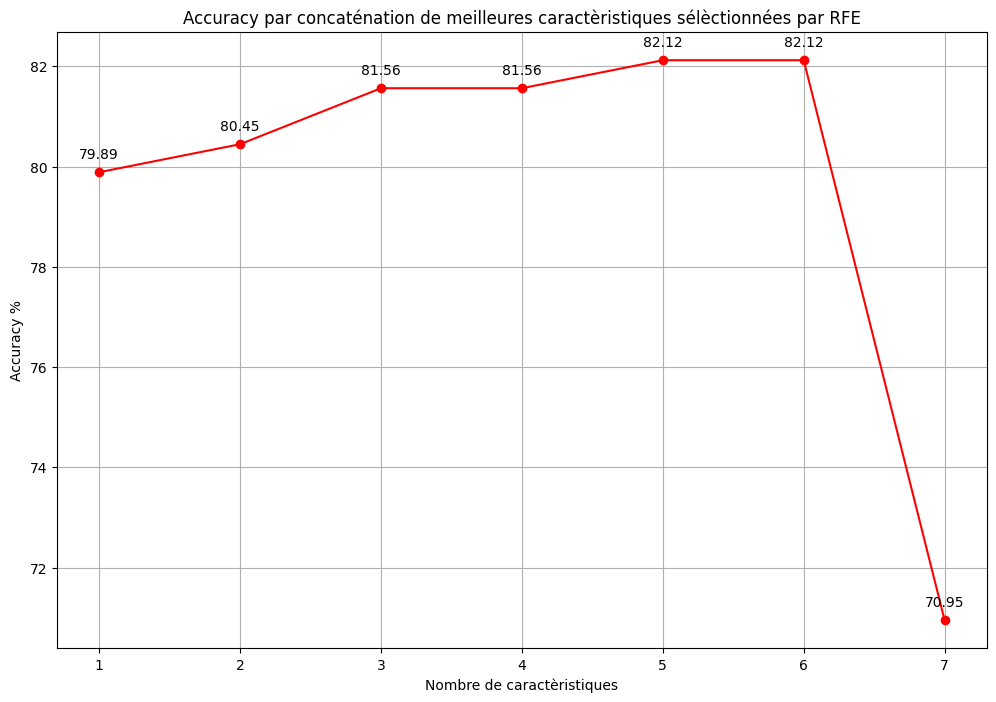

In [ ]:
# Créer une instance RFE et sélectionner un certain nombre de caractéristiques
rfe = RFE(estimator=model, n_features_to_select=1)
# Ajuster le modèle RFE
rfe = rfe.fit(X, y)

# Créer un DataFrame pour afficher les résultats
results = pd.DataFrame({
    'Caractéristique': X.columns,
    'Sélectionnée': rfe.support_,
    'Rang': rfe.ranking_
})
# Trier les résultats par rang et afficher
sorted_results = results.sort_values(by='Rang')
print(sorted_results)
accuraciesRFe = []
for i in range (1,totalFeatures + 1):
  features_names = sorted_results['Caractéristique'][:i]
  print("Fetaures names: ", np.array(features_names))
  features = X[features_names]
  accuracy = classify(features,y)
  accuraciesRFe.append(accuracy * 100)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(1,totalFeatures + 1),accuraciesRFe, marker='o', linestyle='-',color='red')
for i, txt in enumerate(accuraciesRFe):
    plt.annotate(f"{txt:.2f}", (i+1, accuraciesRFe[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Nombre de caractèristiques')
plt.ylabel('Accuracy %')
plt.title('Accuracy par concaténation de meilleures caractèristiques sélèctionnées par RFE')
plt.grid(True)
plt.gca()
plt.show()

On peut remarquer qu’avec une seule caractéristique sélectionnée par RFE qu’est le Sex, le taux de classification est supérieur que celui obtenu par 4 caractéristiques par obtenue Chi2
Cela dit que le RFE est bien meilleur que le Chi2


<h1>Relief</h1>
Tente de déterminer le plus proche voisin d'un certain nombre d'échantillons sélectionnés au hasard à partir de l'ensemble de données. Pour chaque échantillon sélectionné, les valeurs des caractéristiques sont comparées à ceux des voisins les plus proches et les scores pour chaque caractéristique sont mis à jour. L'idée est d'estimer la qualité des attributs en fonction de la qualité de leurs valeurs et faire la distinction entre des échantillons proches les uns des autres

In [ ]:
!pip install sklearn-relief==1.0.0b2

In [ ]:
XBis=np.array(X)
from sklearn_relief import Relief
# Créer une instance de ReliefF
relf = Relief(n_features=7)  # Vous pouvez ajuster le nombre de voisins
# Adapter le modèle à vos données
Xrelief= relf.fit_transform(XBis, y)

classify(Xrelief,y)

Accuracy: 0.7094972067039106
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       117
           1       0.59      0.55      0.57        62

    accuracy                           0.71       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.71      0.71      0.71       179



0.7094972067039106

In [ ]:
from sklearn_relief import Relief
# Créer une instance de ReliefF
relf = Relief(n_features=7)  # Vous pouvez ajuster le nombre de voisins
# Adapter le modèle à vos données
relf.fit(XBis, y)

print ("Poids des caracteristiques: ")
print(relf.w_)

# Créer un DataFrame pour afficher les résultats
resultsRelief = pd.DataFrame({
    'Caractéristique': X.columns,
    'Poids': relf.w_,
})

print(resultsRelief)

Poids des caracteristiques: 
[0.14       0.4        1.41978235 0.46       0.19       3.663629
 0.15      ]
  Caractéristique     Poids
0          Pclass  0.140000
1             Sex  0.400000
2             Age  1.419782
3           SibSp  0.460000
4           Parch  0.190000
5            Fare  3.663629
6        Embarked  0.150000


In [ ]:
# Identifier les indices des caractéristiques les plus importantes
top_feature_indices = np.argsort(relf.w_)[::-1]

# Trier les poids
weights = list(relf.w_)
weights.sort(reverse=True)

resultsRelief = pd.DataFrame({
    'Caractéristique': X.columns[top_feature_indices],
    'Poids': weights,
    'Indice dans X': top_feature_indices,
})
print(resultsRelief)

  Caractéristique     Poids  Indice dans X
0            Fare  3.663629              5
1             Age  1.419782              2
2           SibSp  0.460000              3
3             Sex  0.400000              1
4           Parch  0.190000              4
5        Embarked  0.150000              6
6          Pclass  0.140000              0


Features names:  ['Fare']
Accuracy: 0.7374301675977654
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       117
           1       0.64      0.55      0.59        62

    accuracy                           0.74       179
   macro avg       0.71      0.69      0.70       179
weighted avg       0.73      0.74      0.73       179

Features names:  ['Fare' 'Age']
Accuracy: 0.6536312849162011
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       117
           1       0.50      0.29      0.37        62

    accuracy                           0.65       179
   macro avg       0.60      0.57      0.56       179
weighted avg       0.63      0.65      0.63       179

Features names:  ['Fare' 'Age' 'SibSp']
Accuracy: 0.6480446927374302
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84 

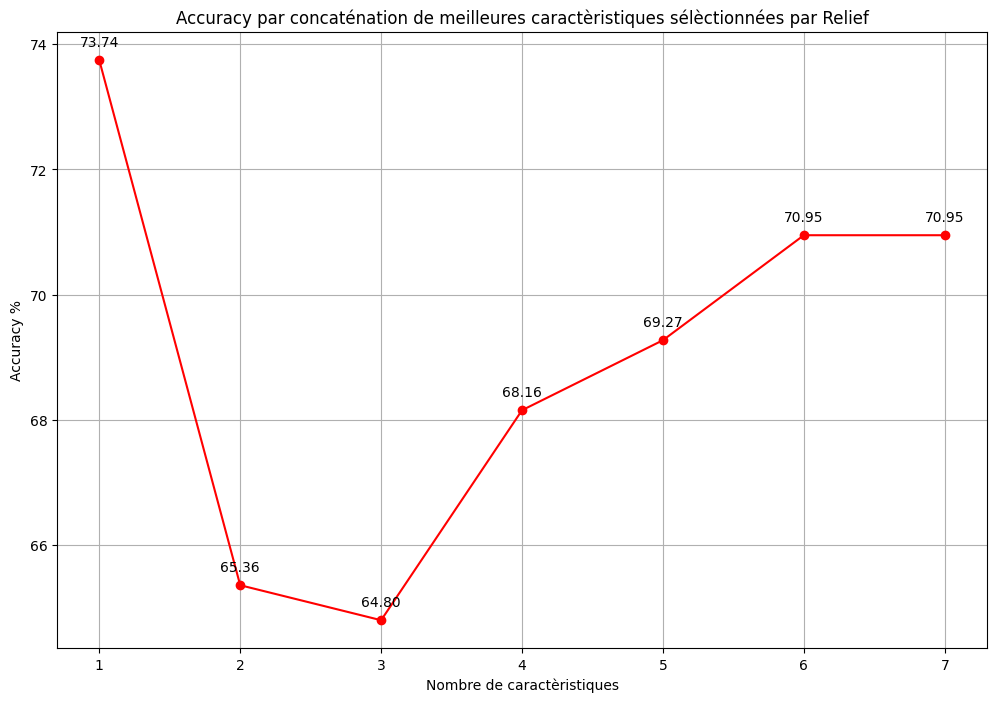

In [ ]:
accuraciesRelief = []
for i in range (1,totalFeatures + 1):
  features_names = X.columns[top_feature_indices][:i]
  print("Features names: ", np.array(features_names))
  features = X[features_names]
  accuracy = classify(features,y)
  accuraciesRelief.append(accuracy * 100)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(1,totalFeatures + 1),accuraciesRelief, marker='o', linestyle='-',color='red')
for i, txt in enumerate(accuraciesRelief):
    plt.annotate(f"{txt:.2f}", (i+1, accuraciesRelief[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Nombre de caractèristiques')
plt.ylabel('Accuracy %')
plt.title('Accuracy par concaténation de meilleures caractèristiques sélèctionnées par Relief')
plt.grid(True)
plt.gca()
plt.show()

On remarque qu’avec seulement 2 caractéristiques Fare et Age nous avons obtenu le meilleur taux de classification.

In [ ]:
weights = list(relf.w_)
weights.sort(reverse=True)
wieghts_sorted=sorted(weights, key = lambda x:float(x))
sorted_indices = np.argsort(relf.w_)[::-1]
# Créer un DataFrame pour afficher les résultats
resultsRelief = pd.DataFrame({
    'Caractéristique': X.columns[sorted_indices],
    'Poids': weights,
    'Accuracy': accuraciesRelief
})

print(resultsRelief)

  Caractéristique     Poids   Accuracy
0            Fare  3.663629  73.743017
1             Age  1.419782  65.363128
2           SibSp  0.460000  64.804469
3             Sex  0.400000  68.156425
4           Parch  0.190000  69.273743
5        Embarked  0.150000  70.949721
6          Pclass  0.140000  70.949721


<h1>Random Forest</h1>
Le Random Forest est une méthode d'apprentissage supervisé utilisée tant pour la classification que pour la régression. C'est l'une des techniques les plus populaires et les plus puissantes disponibles, en raison de sa simplicité, de sa capacité à être utilisée pour plusieurs types de problèmes de prédiction, et de sa robustesse face aux ensembles de données complexes.

Le random forest peut étre aussi utilisé comme méthode de séléction de caractéristiques integrée. Aprés entraînement, un coéfficient d'importance sera attribué à chacune des caractéristiques.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Créer le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entraîner le modèle
rf.fit(X, y)
# Obtenir les importances des caractéristiques
importances = rf.feature_importances_
# Trier les indices des caractéristiques par importance
indices = np.argsort(importances)[::-1]
# Créer un DataFrame pour afficher les résultats
resultsRelief = pd.DataFrame({
    'Caractéristique': X.columns[indices],
    'importance': importances[indices],
})
print(resultsRelief)

  Caractéristique  importance
0            Fare    0.266590
1             Age    0.265045
2             Sex    0.258585
3          Pclass    0.087204
4           SibSp    0.050203
5           Parch    0.038201
6        Embarked    0.034171


Features names:  ['Fare']
Accuracy: 0.7318435754189944
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.83       117
           1       0.89      0.26      0.40        62

    accuracy                           0.73       179
   macro avg       0.80      0.62      0.61       179
weighted avg       0.77      0.73      0.68       179

Features names:  ['Fare' 'Age']
Accuracy: 0.7206703910614525
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       117
           1       0.83      0.24      0.38        62

    accuracy                           0.72       179
   macro avg       0.77      0.61      0.60       179
weighted avg       0.75      0.72      0.67       179

Features names:  ['Fare' 'Age' 'Sex']
Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85   

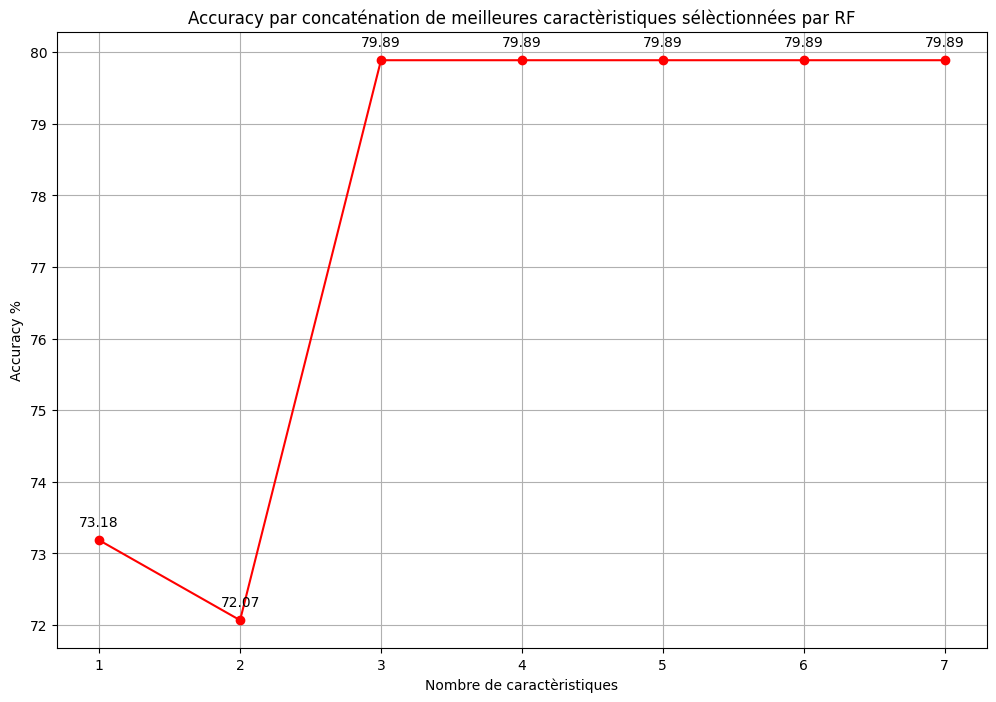

In [ ]:
accuraciesRF = []
for i in range (1,totalFeatures + 1):
  features_names = X.columns[indices][:i]
  print("Features names: ", np.array(features_names))
  features = X[features_names]
  accuracy = classify(features,y)
  accuraciesRF.append(accuracy * 100)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(1,totalFeatures + 1),accuraciesRF, marker='o', linestyle='-',color='red')
for i, txt in enumerate(accuraciesRF):
    plt.annotate(f"{txt:.2f}", (i+1, accuraciesRF[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Nombre de caractèristiques')
plt.ylabel('Accuracy %')
plt.title('Accuracy par concaténation de meilleures caractèristiques sélèctionnées par RF')
plt.grid(True)
plt.gca()
plt.show()

On peut remarquer qu’avec seulement 2 caractéristiques Fare et Age nous avons obtenu le meilleur score de classification.

<H2> Etude comparative </H2>
Dans cette partie, nous allons mener une étude comparative entre les différentes méthodes de sélection de caractéristiques afin de voir la meilleure approche à utiliser.
Nous allons représenter graphiquement les valeurs des accuracies pour les méthodes RFE, Chi2, Relief et Random Forest (RF) en fonction de nombre de caractéristiques sélectionnées.

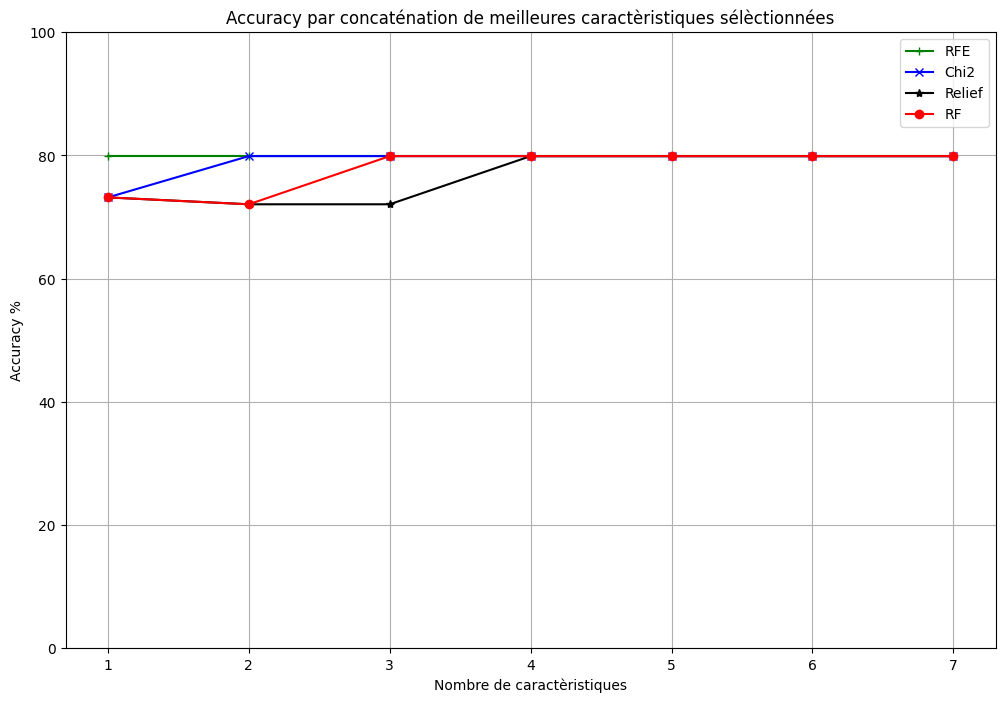

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(1,totalFeatures + 1),accuraciesRFe, marker='+', linestyle='-',color='green', label='RFE')
plt.plot(range(1,totalFeatures + 1),accuraciesChie2, marker='x', linestyle='-',color='blue', label='Chi2')
plt.plot(range(1,totalFeatures + 1),accuraciesRelief, marker='*', linestyle='-',color='black', label='Relief')
plt.plot(range(1,totalFeatures + 1),accuraciesRF, marker='o', linestyle='-',color='red', label='RF')

plt.xlabel('Nombre de caractèristiques')
plt.ylabel('Accuracy %')
plt.title('Accuracy par concaténation de meilleures caractèristiques sélèctionnées')
plt.grid(True)
plt.gca()
plt.legend()

# Ajuster les limites de l'axe des ordonnées pour aller de 0 à 100
plt.ylim([0, 100])

plt.show()

<H1> Conclusion </h1>
Cet atelier présente une vue globale des méthodes et approches de sélection des caractéristiques.
Je vous ai présenté en détails les types de méthodes
1.	Filter avec les algorithmes chi2 et relief
2.	Wrapper, avec l’algorithme RFE
3.	Et Embedded avec l’algorithme Random forest

L’étude comparative montre que le RFE reste le meilleur entre les 4 algorithmes et que même avec une seule caractéristique sélectionnée par RFE, l’accuracy est nettement meilleure que les 3 autres algorithmes.



